# Project: Wrangling and Analyze Data

### Project Overview
##### Introduction
Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.



##### Project Steps Overview
##### Various tasks undertaken in this project are as follows:

1. Gathering data
2. Assessing data
3. Cleaning data
4. Storing data
5. Analyzing and visualizing data
6. Conclusion

In [1]:
#importing the libraries needed for the project
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import os
from PIL import Image
from io import BytesIO
import json
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline
from tweepy import OAuthHandler
from timeit import default_timer as timer


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
#### 1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [39]:
# loading the twitter-archive-enhanced.csv data into 'df'
archive_df = pd.read_csv('twitter-archive-enhanced.csv', encoding = 'UTF-8')

#### 2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [40]:
#Creating folder 
folder_name = 'Image_Predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
#Getting the URL
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

#view the raw data with
response.content

#Saving file
with open(os.path.join(folder_name, url.split('/')[-1]),mode='wb') as file:
        file.write(response.content)

In [41]:
# Read the downloaded file into a dataframe 'df_images'
df_images = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')


#### 3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

#### NB: I run into a few challenges assessing the twitter api. The tweet_json.txt file was provided as a supporting for students like me faced with such challenge.

 

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

##### Since the minumum columns required (from the tweet_json.txt data) to be read into a pandas Dataframe are the [tweet_ID, retweet_count and favorite_count], they are the only coolumns labels in this 'df_tweet_json' dataframe

In [42]:
# created an empty list and looped after which the tweet_json data is looped through and read into the list
t_list = []
with open ('tweet-json.txt',  'r') as file:
    for line in file:
        data = json.loads(line)
        t_list.append(data)
df_tweet_json = pd.DataFrame(t_list, columns = ['id', 'retweet_count', 'favorite_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### assessing all three datasets gathered earlier
    -twitter_archive_enhanced.csv
    -image_predictions.tsv
    -tweet_json.txt


####   -assessing the "twitter_archive_enhanced" data

In [43]:
archive_df.sample(6)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
264,842163532590374912,NaN,NaN,2017-03-16 00:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet George. He looks slightly deflated but ov...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/842163532...,12,10,George,None,None,None,None
1621,684926975086034944,NaN,NaN,2016-01-07 02:38:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bruiser &amp; Charlie. They are the best ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684926975...,11,10,Bruiser,None,None,None,None
1649,683742671509258241,NaN,NaN,2016-01-03 20:12:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sebastian. He's a womanizer. Romantic af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683742671...,11,10,Sebastian,None,None,None,None
1166,722613351520608256,NaN,NaN,2016-04-20 02:30:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Schnitzel. He's a Tropicana Floofboop. Ge...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722613351...,12,10,Schnitzel,None,None,None,None
1344,704499785726889984,NaN,NaN,2016-03-01 02:53:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you wake up from a long nap and have no i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704499785...,12,10,None,None,None,None,None
1552,688916208532455424,NaN,NaN,2016-01-18 02:49:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper just wants to say hello. 11/10 wou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688916208...,11,10,None,None,None,pupper,None


In [44]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [45]:
archive_df.groupby('rating_denominator').count().rating_numerator

rating_denominator
0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_numerator, dtype: int64

In [46]:
archive_df.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351        None
2352           a
2353          

In [47]:
archive_df.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Lola         10
Penny        10
Bo            9
Winston       9
Sadie         8
the           8
Toby          7
Bailey        7
Buddy         7
an            7
Daisy         7
Oscar         6
Scout         6
Bella         6
Rusty         6
Dave          6
Jack          6
Jax           6
Koda          6
Leo           6
Stanley       6
Milo          6
Larry         5
           ... 
Trip          1
Ginger        1
Cupid         1
Ed            1
Holly         1
Tom           1
Horace        1
Toffee        1
Buddah        1
Todo          1
Josep         1
Binky         1
Jomathan      1
Brandy        1
Zeek          1
Ronduh        1
Jaycob        1
Napolean      1
Clybe         1
Steve         1
Bradley       1
Reptar        1
Ralphie       1
Patch         1
Mo            1
Rooney        1
Gin           1
Tessa         1
Hamrick       1
Tiger         1
Name: name, Length: 957,

#### assessing 'image_predictions' data table

In [48]:
df_images.sample(6)
 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
110,667886921285246976,https://pbs.twimg.com/media/CUTPnPCW4AI7R0y.jpg,1,Pomeranian,0.800432,True,Pekinese,0.168445,True,Chihuahua,0.008950,True
1433,773547596996571136,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,1,Norwegian_elkhound,0.372202,True,Chesapeake_Bay_retriever,0.137187,True,malamute,0.071436,True
172,669000397445533696,https://pbs.twimg.com/media/CUjETvDVAAI8LIy.jpg,1,Pembroke,0.822940,True,Cardigan,0.177035,True,basenji,0.000023,True
602,679828447187857408,https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg,3,Chihuahua,0.346545,True,dalmatian,0.166246,True,toy_terrier,0.117502,True
488,675517828909424640,https://pbs.twimg.com/media/CV_r3v4VAAALvwg.jpg,1,Scottish_deerhound,0.240591,True,groenendael,0.156916,True,flat-coated_retriever,0.090899,True
1611,801285448605831168,https://pbs.twimg.com/media/Cx683NPUAAAjyU4.jpg,1,minivan,0.789376,False,beach_wagon,0.081125,False,convertible,0.064534,False


In [49]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [108]:
df_images.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

##### Assessing -tweet_json.txt

In [102]:
df_tweet_json.sample(8)


,id,retweet_count,favorite_count
1471,693647888581312512,673,2961
2268,667502640335572993,231,563
2161,669375718304980992,792,1425
823,769695466921623552,1926,7101
1607,685547936038666240,17465,35052
2130,670079681849372674,1373,2390
1413,698703483621523456,425,1608
1276,708853462201716736,745,1941


In [51]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [52]:
df_tweet_json.id.duplicated().sum()

0

In [104]:
df_tweet_json.duplicated().sum()

0

#### Tweet archive enhanced (archive_df)
- Too much missing data from some columns in this table. The columns [retweeted_status_id, retweeted_status_timestamp, 
retweeted_status_user_id, in_reply_to_status_id, in_reply_to_user_id] appears to have less than 190 value entries   instead of the default 2356 entries.
- The issue of rating_denominator column value exceeding 10
- Errorneaus column label,column labeled 'text' when we dealing with tweets.
- Incorrect names like 'a', 'the','an', in the ['name'] column. Those are not actual names of people.
- 'None' values in the ['name'] column instead of NaN to fill in rows with missing values is an issue that cannot be ignored.

#### Image Prediction Table ( df_image ) 
- The columns, [p1,p1_conf, p2,p2_conf, p3, p3_conf...] cannot be understood in the table, they could mean anything
- Delete duplicate values
- Dropping unwanted column ['img_num'] column

#### Tweet_json (df_tweet_json)
- Errorneaus column "id" since we working with tweet ID's in that column

### Tidiness issues
- Merge all three datasets into one dataset, 'archive_clean', df_images and 'tweet_clean' data.
- Merging all types of dogs into a single column 'dog_stage'

### Cleaning

In [53]:
# Make copies of original pieces of data
archive_clean = archive_df.copy() # copy of the 'twitter archive enhanced' data


images_clean = df_images.copy() # copy of the 'image prediction' data


tweet_clean = df_tweet_json.copy()  # copy of the 'tweet-json' data


### Issue #1:

#### Define: 
    Dropping columns not needed for the analysis

    dropping the columns ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 'retweeted_user_status_id',
    'retweeted_status_timestamp','expanded_url'] from the 'archive_clean' table

#### Code

In [54]:
#Removing the retweets
archive_clean = archive_clean[archive_clean.retweeted_status_user_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_timestamp.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

#Removing the replies
archive_clean = archive_clean[archive_clean.in_reply_to_user_id.isnull()]
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isnull()]


In [55]:
archive_clean.drop(columns =['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
                            'retweeted_status_timestamp', 'source'], inplace = True)

#### Test

In [56]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(8)
memory usage: 196.6+ KB


### Issue #2

#### Define
-rating_denominator standard rate 10

#### Code

In [57]:
# use loop to set clean_df.rating_denominator rate to 10

for x in archive_clean.rating_denominator:
    archive_clean.rating_denominator=10.0

#### Test

In [58]:
#checking  for total rating_denominator with values exceeding the rating 10
sum(archive_clean.rating_denominator>10)

0

### Issue #3

#### Define
-change column name text to be tweet
 

#### Code

In [59]:
 #rename text column to tweet
archive_clean.rename(columns={'text':'tweet'},inplace=True)

#### Test

In [60]:
#chceking list of columns to confirm the chnage made
list(archive_clean)

['tweet_id',
 'timestamp',
 'tweet',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Issue #4

#### Define
-change value for None to be NaN in the 'name' column

#### Code

#### Test

In [61]:
# change 'None' to be NaN, np.nan
archive_clean['name'] = archive_clean['name'].replace('None', np.nan)

In [62]:
archive_clean.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5            NaN
6            Jax
7            NaN
8           Zoey
9         Cassie
10          Koda
11         Bruno
12           NaN
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
20        Gerald
21       Jeffrey
22          such
23        Canela
24           NaN
25           NaN
26          Maya
27        Mingus
28         Derek
29        Roscoe
31       Waffles
          ...   
2326       quite
2327           a
2328         NaN
2329         NaN
2330         NaN
2331         NaN
2332         NaN
2333          an
2334           a
2335          an
2336         NaN
2337         NaN
2338         NaN
2339         NaN
2340         NaN
2341         NaN
2342         NaN
2343         NaN
2344         NaN
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351         NaN
2352           a
2353          

In [63]:
#drop 'a' 
for x in archive_clean['name']:
    if x == "a":
         
        archive_clean.name=archive_clean.name.replace('a',np.nan)

In [64]:
#drop 'an'
for x in archive_clean['name']:
    if x == "an":
         
        archive_clean.name=archive_clean.name.replace('an',np.nan)

In [65]:
for x in archive_clean['name']:
    if x == "the":
         
        archive_clean.name=archive_clean.name.replace('the',np.nan)

In [66]:
#after running my first line i noticed other erros [ 'a', 'an', 'the'] in the name column which had to be removed,
# thus replaced with NaN value 
archive_clean.name.sample(7)

2270       Hall
631       Laika
1334    Ambrose
6           Jax
695       Logan
481       Titan
1006     Keurig
Name: name, dtype: object

### Issue #5
### Image Prediction Data

#### Define
- Undescriptive column labels [p1,p1_conf, p2,p2_conf, p3, p3_conf...]
- change name for  p1,p2 and p3 ...

#### Code

In [67]:
 #rename undescriptive columns name
images_clean = images_clean.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'})

#### Test

In [68]:
images_clean.sample(8)

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
941,704054845121142784,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1,Great_Pyrenees,0.667939,True,kuvasz,0.228764,True,golden_retriever,0.043885,True
231,670411370698022913,https://pbs.twimg.com/media/CU3HlZtW4AAezbt.jpg,1,Maltese_dog,0.584397,True,miniature_schnauzer,0.064201,True,toy_poodle,0.060868,True
643,681523177663676416,https://pbs.twimg.com/media/CXVBtX_WwAEuqbP.jpg,1,Norfolk_terrier,0.205067,True,German_shepherd,0.160439,True,chow,0.156234,True
634,681193455364796417,https://pbs.twimg.com/media/CXQV03pWYAAVniz.jpg,1,Pomeranian,0.992619,True,keeshond,0.004356,True,schipperke,0.000814,True
652,682032003584274432,https://pbs.twimg.com/media/CXcQfUNUQAEwFoQ.jpg,1,schipperke,0.997953,True,groenendael,0.000676,True,miniature_pinscher,0.000211,True
83,667495797102141441,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1,Chihuahua,0.143957,True,Christmas_stocking,0.118651,False,ski_mask,0.092482,False
64,667171260800061440,https://pbs.twimg.com/media/CUJEuRIXIAAPDLt.jpg,1,giant_schnauzer,0.841265,True,Lakeland_terrier,0.052744,True,Irish_water_spaniel,0.034402,True
1129,728015554473250816,https://pbs.twimg.com/media/ChpuRyvVAAARMoq.jpg,1,cocker_spaniel,0.384559,True,golden_retriever,0.091661,True,sandbar,0.081799,False


In [69]:
# column names looks good now 
list(images_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'first_prediction',
 'first_confidence',
 'first_dog',
 'second_prediction',
 'second_confidence',
 'second_dog',
 'third_prediction',
 'third_confidence',
 'third_dog']

### Issue #6

#### Define
- Delete duplicate values

#### Code

In [70]:
 #dropping duplicate values
images_clean = images_clean.drop_duplicates(subset=['jpg_url'], keep='first')

#### Test

In [71]:
# results 
images_clean.jpg_url.duplicated().sum()

0

### Issue #7

#### Define
dropping unwanted column ['img_num'] column


#### Code

In [72]:
#dropping img_num column
images_clean = images_clean.drop("img_num",1)

#### Test

In [73]:
list(images_clean) # unwanted colunm dropped

['tweet_id',
 'jpg_url',
 'first_prediction',
 'first_confidence',
 'first_dog',
 'second_prediction',
 'second_confidence',
 'second_dog',
 'third_prediction',
 'third_confidence',
 'third_dog']

### Issue #8
### Tweet-json data

#### Define
-change the column id  to tweet_id 

#### Code

In [74]:
#rename the column id  to tweet_id 
tweet_clean = tweet_clean.rename(columns={'id':'tweet_id'})

#### Test

In [76]:
 
tweet_clean.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


In [101]:
list(tweet_clean)

['tweet_id', 'retweet_count', 'favorite_count']

### Tidiness 

### Issue #9

#### Define
merging all types of dogs into a single column 'dog_stage'

In [79]:
#useing for loop to fillter dogs stage
stage = ['doggo','pupper', 'floofer', 'puppo' ]
for i in stage:
       archive_clean[i] = archive_clean[i].replace('None', '')

In [80]:
# use cat to combine and  Create dog_stage to put all type of dogs classification
archive_clean['dog_stage'] = archive_clean.doggo.str.cat(archive_clean.floofer).str.cat(archive_clean.pupper).str.cat(archive_clean.puppo)

# dropping the four old dog columns
archive_clean = archive_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

# filling up the empty rows in the dataframe np.nan
archive_clean['dog_stage'] = archive_clean['dog_stage'].replace('', np.nan)

#### Test

In [81]:
#the code checks the sample data to confirm the newly created column ['dog_stage'],
# and to verify if we've successfully replaced 'Nope' with 'Nan' and also check for the dropped dog columns 
archive_clean.sample(7)

,tweet_id,timestamp,tweet,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
905,758099635764359168,2016-07-27 00:40:12 +0000,In case you haven't seen the most dramatic sne...,https://vine.co/v/hQJbaj1VpIz,13,10.0,NaN,NaN
235,847606175596138505,2017-03-31 00:27:14 +0000,This is Cannon. He just heard something behind...,https://twitter.com/dog_rates/status/847606175...,12,10.0,Cannon,NaN
2159,669571471778410496,2015-11-25 17:40:53 +0000,This is Keith. He's had 13 DUIs. 7/10 that's t...,https://twitter.com/dog_rates/status/669571471...,7,10.0,Keith,NaN
1286,708400866336894977,2016-03-11 21:15:02 +0000,RT if you are as ready for summer as this pup ...,https://vine.co/v/iHFqnjKVbIQ,12,10.0,NaN,NaN
1782,677687604918272002,2015-12-18 03:11:30 +0000,This was Cindy's face when she heard Susan for...,https://twitter.com/dog_rates/status/677687604...,11,10.0,NaN,NaN
100,872820683541237760,2017-06-08 14:20:41 +0000,Here are my favorite #dogsatpollingstations \n...,https://twitter.com/dog_rates/status/872820683...,13,10.0,NaN,NaN
505,812781120811126785,2016-12-24 22:04:54 +0000,This is Swagger. He's the Cleveland Browns amb...,https://twitter.com/dog_rates/status/812781120...,10,10.0,Swagger,NaN


### Issue #10

#### Define
Merge 'archive_clean' data with 'tweet_clean' data.

Merge the result[merge_1] with the image prediction data, ['image_clean']



#### Code

In [82]:
#Merge archive_clean data with tweet_clean data

merge_1 =pd.merge(archive_clean, tweet_clean, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [83]:
list(merge_1) # displaying resulting columns 

['tweet_id',
 'timestamp',
 'tweet',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'retweet_count',
 'favorite_count']

In [84]:
merge_1.sample(8)

,tweet_id,timestamp,tweet,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
730,686050296934563840,2016-01-10 05:01:51 +0000,This is Flávio. He's a Macedonian Poppycock. 9...,https://twitter.com/dog_rates/status/686050296...,11,10.0,Flávio,NaN,836,2420
1961,860524505164394496,2017-05-05 16:00:04 +0000,This is Carl. He likes to dance. Doesn't care ...,https://twitter.com/dog_rates/status/860524505...,13,10.0,Carl,NaN,5698,24678
1326,749981277374128128,2016-07-04 15:00:45 +0000,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10.0,Atticus,NaN,2772,5569
1865,837820167694528512,2017-03-04 00:21:08 +0000,"Here's a pupper before and after being asked ""...",https://twitter.com/dog_rates/status/837820167...,12,10.0,NaN,pupper,8952,37277
766,688385280030670848,2016-01-16 15:40:14 +0000,This is Louis. He's takes top-notch selfies. 1...,https://twitter.com/dog_rates/status/688385280...,12,10.0,Louis,NaN,5035,10180
1387,757400162377592832,2016-07-25 02:20:45 +0000,She walks herself up and down the train to be ...,https://twitter.com/dog_rates/status/757400162...,13,10.0,NaN,NaN,7759,16743
1196,732585889486888962,2016-05-17 14:57:41 +0000,"When your teacher agreed on 10,000 RTs and no ...",https://twitter.com/dog_rates/status/732585889...,10,10.0,NaN,NaN,868,4016
25,666362758909284353,2015-11-16 21:10:36 +0000,Unique dog here. Very small. Lives in containe...,https://twitter.com/dog_rates/status/666362758...,6,10.0,NaN,NaN,595,804


In [85]:
# a detailed description of the newly merged datasets merge_1
merge_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 10 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
tweet                 2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null float64
name                  1425 non-null object
dog_stage             336 non-null object
retweet_count         2097 non-null int64
favorite_count        2097 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 180.2+ KB


In [86]:
#Merge archive_clean data with tweet_clean data

merge_2 = pd.merge(merge_1, images_clean, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [87]:
# displaying columns of our newly merged data
list(merge_2)

['tweet_id',
 'timestamp',
 'tweet',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'first_prediction',
 'first_confidence',
 'first_dog',
 'second_prediction',
 'second_confidence',
 'second_dog',
 'third_prediction',
 'third_confidence',
 'third_dog']

In [88]:
merge_2.sample(5)

,tweet_id,timestamp,tweet,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
662,683142553609318400,2016-01-02 04:27:31 +0000,Meet Brandy. She's a member of the Bloods. Men...,https://twitter.com/dog_rates/status/683142553...,9,10.0,Brandy,pupper,1173,3162,https://pbs.twimg.com/media/CXsChyjW8AQJ16C.jpg,Leonberg,0.605851,True,chow,0.183470,True,German_shepherd,0.079662,True
686,684567543613382656,2016-01-06 02:49:55 +0000,This is Bobby. He doesn't give a damn about pe...,https://twitter.com/dog_rates/status/684567543...,4,10.0,Bobby,NaN,1418,3312,https://pbs.twimg.com/media/CYASi6FWQAEQMW2.jpg,minibus,0.401942,False,llama,0.229145,False,seat_belt,0.209393,False
1432,779377524342161408,2016-09-23 17:50:56 +0000,Have you ever seen such a smol pupper? Portabl...,https://twitter.com/dog_rates/status/779377524...,12,10.0,NaN,pupper,3613,9831,https://pbs.twimg.com/ext_tw_video_thumb/77937...,sundial,0.170921,False,cash_machine,0.060359,False,maze,0.054981,False
1259,750147208377409536,2016-07-05 02:00:06 +0000,"And finally, happy 4th of July from the squad ...",https://twitter.com/dog_rates/status/750147208...,13,10.0,NaN,NaN,1095,3409,https://pbs.twimg.com/media/CmkO57iXgAEOxX9.jpg,pug,0.977765,True,Boston_bull,0.004794,True,French_bulldog,0.004573,True
1359,766693177336135680,2016-08-19 17:47:52 +0000,This is Brudge. He's a Doberdog. Going to be h...,https://twitter.com/dog_rates/status/766693177...,11,10.0,Brudge,NaN,918,4484,https://pbs.twimg.com/media/CqPXYLLXEAAU2HC.jpg,Doberman,0.948355,True,vizsla,0.015032,True,Rhodesian_ridgeback,0.009631,True


#### Test

In [89]:
#our newly merged data, form merging the datasets used at the inception of this analysis
merge_2

,tweet_id,timestamp,tweet,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,2015-11-15 22:32:08 +0000,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10.0,NaN,NaN,532,2535,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10.0,NaN,NaN,48,132,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10.0,NaN,NaN,47,128,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10.0,NaN,NaN,147,311,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10.0,NaN,NaN,41,111,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,2015-11-16 00:30:50 +0000,This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,10,10.0,NaN,NaN,60,136,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,2015-11-16 00:35:11 +0000,This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2,10.0,NaN,NaN,879,1253,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,2015-11-16 00:49:46 +0000,Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,10,10.0,NaN,NaN,261,448,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,2015-11-16 00:55:59 +0000,My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,9,10.0,NaN,NaN,146,304,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,2015-11-16 01:01:59 +0000,Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,8,10.0,NaN,NaN,61,115,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [90]:
merge_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 20 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
tweet                 1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null float64
name                  1379 non-null object
dog_stage             303 non-null object
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
jpg_url               1971 non-null object
first_prediction      1971 non-null object
first_confidence      1971 non-null float64
first_dog             1971 non-null bool
second_prediction     1971 non-null object
second_confidence     1971 non-null float64
second_dog            1971 non-null bool
third_prediction      1971 non-null object
third_confidence      1971 non-null float64
third_dog             1971 non-null bool
dtypes: bool(3), float64(4), int64(4), o

## Storing Data
-Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [91]:
# saving and storing new data [ merge_2] in csv
merge_2.to_csv('twitter_archive_master.csv', index = False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [3]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv',  encoding = 'utf-8')
twitter_archive_master

,tweet_id,timestamp,tweet,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,2015-11-15 22:32:08 +0000,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10.0,NaN,NaN,532,2535,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10.0,NaN,NaN,48,132,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10.0,NaN,NaN,47,128,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10.0,NaN,NaN,147,311,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10.0,NaN,NaN,41,111,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,2015-11-16 00:30:50 +0000,This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,10,10.0,NaN,NaN,60,136,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,2015-11-16 00:35:11 +0000,This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2,10.0,NaN,NaN,879,1253,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,2015-11-16 00:49:46 +0000,Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,10,10.0,NaN,NaN,261,448,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,2015-11-16 00:55:59 +0000,My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,9,10.0,NaN,NaN,146,304,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,2015-11-16 01:01:59 +0000,Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,8,10.0,NaN,NaN,61,115,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [4]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 20 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
tweet                 1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null float64
name                  1379 non-null object
dog_stage             303 non-null object
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
jpg_url               1971 non-null object
first_prediction      1971 non-null object
first_confidence      1971 non-null float64
first_dog             1971 non-null bool
second_prediction     1971 non-null object
second_confidence     1971 non-null float64
second_dog            1971 non-null bool
third_prediction      1971 non-null object
third_confidence      1971 non-null float64
third_dog             1971 non-null bool
dtypes: bool(3), float64(4), int64(4), o

In [5]:
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,first_confidence,second_confidence,third_confidence
count,1.971000e+03,1971.000000,1971.0,1971.000000,1971.000000,1971.000000,1.971000e+03,1.971000e+03
mean,7.360418e+17,12.223237,10.0,2784.449518,8949.106545,0.594558,1.345850e-01,6.016556e-02
std,6.752810e+16,41.634034,0.0,4697.662893,12267.799790,0.272126,1.010527e-01,5.094156e-02
min,6.660209e+17,0.000000,10.0,16.000000,81.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758656e+17,10.000000,10.0,628.500000,1997.000000,0.363091,5.339800e-02,1.608055e-02
50%,7.088343e+17,11.000000,10.0,1367.000000,4147.000000,0.587764,1.173970e-01,4.944380e-02
75%,7.880951e+17,12.000000,10.0,3239.000000,11402.500000,0.847827,1.955655e-01,9.153815e-02
max,8.924206e+17,1776.000000,10.0,79515.000000,132810.000000,1.000000,4.880140e-01,2.734190e-01


### Insights

#### Insight 1.
    Most common dog name given to dogs by their owners

In [9]:
#dog name people often use'
twitter_archive_master.name.value_counts()


Charlie         11
Cooper          10
Oliver          10
Lucy            10
Tucker           9
Penny            9
Sadie            8
Winston          8
Lola             7
Daisy            7
Toby             7
Bo               6
Koda             6
Jax              6
Bella            6
Stanley          6
Rusty            5
Leo              5
Chester          5
Oscar            5
Bailey           5
Scout            5
Dave             5
Milo             5
Louis            5
Buddy            5
one              4
Bentley          4
Sophie           4
Jerry            4
                ..
Mo               1
Sephie           1
Jeffrie          1
Kenny            1
Tassy            1
Tommy            1
Rose             1
Lilli            1
Tedders          1
Poppy            1
Taz              1
Ike              1
Chelsea          1
Snicku           1
Mauve            1
Cleopatricia     1
Tripp            1
Howie            1
Mojo             1
Eazy             1
Saydee           1
Fletcher    

#### Insight 2.
    In the 'dog_stage' column, the 'pupper'emerged with the highest favourite_count.

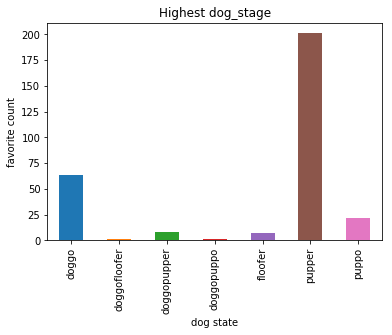

In [96]:
#highest Dogs Stage according to favorite counts on a bar plot
twitter_archive_master.groupby("dog_stage")['favorite_count'].count().plot(kind='bar');
plt.xlabel('dog state')
plt.ylabel('favorite count')
plt.title('Highest dog_stage');

#### Insight 3
    There seem to be a positive linear relationship between favorite_count and retweet_count.

Text(0.5,1,'Favorite count vs Retweet count')

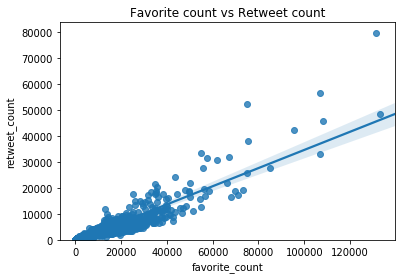

In [98]:
sns.regplot(x= 'favorite_count', y='retweet_count', data = twitter_archive_master )
plt.ylim ( 0, )
plt.title('Favorite count vs Retweet count')


### Visualization

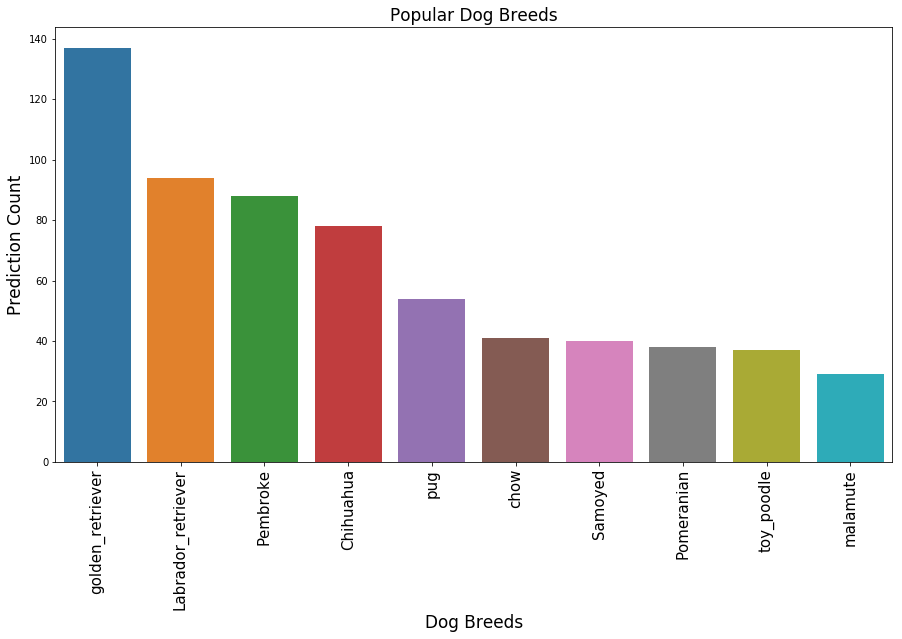

In [99]:
# a barplot showing the most popular dog
plt.figure(figsize = (15,8))
ax = sns.barplot(x = twitter_archive_master['first_prediction'].value_counts()[0:10].index,
            y =twitter_archive_master['first_prediction'].value_counts()[0:10],
            data = twitter_archive_master);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.xlabel("Dog Breeds",fontsize = 17);
plt.ylabel("Prediction Count",fontsize = 17);
plt.title("Popular Dog Breeds",fontsize = 17);

it appears the 'Golden retriever' is the most popular dog in this dataset.

#### Conclusion

    The dataset that is wrangled and analyzed and visualized, is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs dataset was gathered assessed and analysed to gain a few insights,for instance the golden retriever' appeared to be the most popular dog breed in the dataset, followed by a few highly recognised breeds.

#### References

    pandas - https://pandas.pydata.org/
    seaborn - https://seaborn.pydata.org/
